# Individual Project: Exploring CO2 Emissions over Time: A Replication Study

## Objectives

The objectives of this case study is to replicate the **Bloomberg Open Case Study** on exploring CO2 emissions over time, focusing on global and U.S. data. The original case study was conducted using R programming, and this project will involve replicating the analysis using Python. Through this project, I am going to:

1. Analysis CO2 emissions data over time for the world and the U.S..
2. Investigate trends in CO2 emissions and explore the relationship between CO2 emissions and temperature.
3. Create visualizations to compare CO2 emissions among different countries over time.
4. Calculate key statistics such as the mean, standard deviation, and correlation for CO2 emissions and temperature.

The project aims to provide insights into the role of CO2 emissions in climate change and sustainability efforts.

## 1. Main Questions

The main questions for the case study:

**1. How have global CO2 emission rates changed over time? In particular for the U.S., and how does the U.S. compare to other countries?**
   - What are the trends in CO₂ emissions globally and in the U.S. over time?
   - How do these trends in the U.S. compare with those of other major CO₂ emitting countries?

**2. Are CO2 emissions in the U.S. global temperatures, and natural disaster rates in the U.S. associated?**
   - What is the relationship between CO₂ emissions in the U.S. and global temperature trends?
   - Is there any correlation between CO₂ emissions in the U.S. and the rate of natural disasters within the U.S.?

## 2. What are the Data?

In this case study I will be using data related to CO2 emissions, as well as other data that may influence, be influenced or relate to CO2 emissions. Most of the data is from Gapminder that was originally obtained from the World Bank.
    
Additionally, I will use some data that is specific to the United States from the National Oceanic and Atmospheric Administration(NOAA), which is an agency that collects weather and climate data.

### Data Structure

The dataset includes several key columns:

**1. CO2 Emissions**: Data on CO2 emissions from 1751 to 2014, which is sourced from Gapminder, originally sourced from Carbon Dioxide Information Analysis Center(CDIAC). This data measures CO2 emissions in tonnes or metric tons(equivalent to approximately 2204.6 pounds) per person by country.
    
**2. GDP per capita(percent yearly growth)**: Data from 1801 to 2019, which is sourced from Gapminder, originally sourced from the World Bank. This data measures the Growth Domestic Product(which is an overall measure of the health of nation's economy) per person by country.

**3. Energy use per person**: Data from 1960 to 2015, which is sourced from Gapminder, originally sourced from the World Bank. This data measures the us of primary energy before transformation to other end-use fuels, by country.

**4. US Natural Disasters**: Data from 1980 to 2019, which is sourced from The National Oceanic and Atomspheric Administration(NOAA). This data measures U.S. natural disasters, including droughts, floods, freezes, severe storms, tropical cyclones, wildfires, and winter storms.

**5. Temperature**: Data from 1895 to 2019, which is sourced from The National Oceanic and Atomspheric Administration(NOAA). This data measures U.S. national yearly average temperature(in Fahrenheit).

## 3. Data Import

In this step, I imported the five datasets required for the analysis. The data files include CO2 emissions, GDP per capita, energy use per person, US natural disaster costs, and US temperature data.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing the 5 datasets
co2_emissions = pd.read_csv("co2_pcap_cons.csv")
gdp_growth = pd.read_csv("gdp_pcap.csv")
energy_use = pd.read_csv("energy_use_per_person.csv")
us_disasters = pd.read_csv("us_disasters.csv", skiprows=3)
us_temperature = pd.read_csv("us_temperatures.csv", skiprows=3)

## 4. Data Wrangling

Data Wrangling involves transforming raw data into clean, structured format suitable for analysis. During this steo, I will focus on cleaning the data by handling missing values, correcting inconsistencies, and ensuring data accuracy for each of the 5 datasets. Common tasks include data type conversions, dealing with missing data, removing or replacing outliers, renaming columns, and merging or splitting datasets as needed. These steps improve data quality, providing a solid foundation for further visualization and modeling analysis.

#### Yearly CO2 Emissions

In [5]:
# View the first 3 rows of the dataset
co2_emissions.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.28,0.253,0.262,0.245,0.247,0.254,0.261,0.261,0.279,0.284
1,Angola,0.009,0.009,0.009,0.009,0.009,0.009,0.010,0.010,0.010,...,1.28,1.640,1.220,1.180,1.150,1.120,1.150,1.120,1.200,1.230
2,Albania,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,2.27,2.250,2.040,2.010,2.130,2.080,2.050,2.000,2.120,2.100


In [6]:
# Convert the data format to "long" format
co2_years = co2_emissions.columns[1:]
co2_emissions_long = co2_emissions.melt(id_vars=["country"], value_vars=co2_years, var_name="Year", value_name="Emissions")
# Checking the dataset after converting
co2_emissions_long.head(3)

,country,Year,Emissions
0,Afghanistan,1800,0.001
1,Angola,1800,0.009
2,Albania,1800,0.001


In [7]:
# Converting variable types, renaming columns, and adding column to the data
co2_emissions_long = co2_emissions_long.rename(columns={"country": "Country"})
co2_emissions_long['Year'] = pd.to_numeric(co2_emissions_long['Year'], errors='coerce')
co2_emissions_long['Emissions'] = pd.to_numeric(co2_emissions_long['Emissions'], errors='coerce')
co2_emissions_long['Label'] = "CO2 Emissions(Metric Tons)"
# Checking variable types after converting
print(co2_emissions_long.dtypes)

Country       object
Year           int64
Emissions    float64
Label         object
dtype: object


In [8]:
# Checking if there are any NA values and drop if there are any
print(co2_emissions_long.isnull().sum())
co2_emissions_long = co2_emissions_long.dropna()

Country      0
Year         0
Emissions    7
Label        0
dtype: int64


In [9]:
# Checking if the co2_emissions dataset has been properly organized by year and emission values
co2_emissions = co2_emissions_long
print(co2_emissions.info())
co2_emissions.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 43255 entries, 0 to 43261
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    43255 non-null  object 
 1   Year       43255 non-null  int64  
 2   Emissions  43255 non-null  float64
 3   Label      43255 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ MB
None


,Country,Year,Emissions,Label
1187,Brazil,1806,0.028,CO2 Emissions(Metric Tons)
22009,Japan,1913,1.070,CO2 Emissions(Metric Tons)
13757,Tuvalu,1870,0.036,CO2 Emissions(Metric Tons)
10216,Netherlands,1852,1.200,CO2 Emissions(Metric Tons)
34182,Comoros,1976,0.152,CO2 Emissions(Metric Tons)


#### Yearly Growth in GDP per Capita

In [10]:
# View the first 3 rows of the dataset
gdp_growth.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,481,481,481,481,481,481,481,481,481,...,4680,4790,4910,5020,5140,5260,5380,5510,5640,5780
1,Angola,373,374,376,378,379,381,383,385,386,...,24.5k,25k,25.6k,26.1k,26.6k,27.1k,27.7k,28.2k,28.8k,29.3k
2,Albania,469,471,472,473,475,476,477,479,480,...,54.5k,55.1k,55.7k,56.3k,56.9k,57.4k,58k,58.6k,59.2k,59.8k


In [11]:
# Convert the data format to "long" format
gdp_growth_long = gdp_growth.melt(id_vars=["country"], var_name="Year", value_name="GDP")
# Checking the dataset after converting
gdp_growth_long.head(3)

,country,Year,GDP
0,Afghanistan,1800,481
1,Angola,1800,373
2,Albania,1800,469


In [12]:
# Converting variable types, renaming columns, and adding column to the data
gdp_growth_long = gdp_growth_long.rename(columns={"country": "Country"})
gdp_growth_long['Year'] = pd.to_numeric(gdp_growth_long['Year'])
gdp_growth_long['Label'] = "GDP Growth/Capita (%)"
# Checking variable types after converting
print(gdp_growth_long.dtypes)

Country    object
Year        int64
GDP        object
Label      object
dtype: object


In [13]:
# Checking if there are any NA values and drop if there are any
print(gdp_growth_long.isnull().sum())
gdp_growth_long = gdp_growth_long.dropna()

Country    0
Year       0
GDP        0
Label      0
dtype: int64


In [14]:
# Checking if the gdp_growth dataset has been properly organized by year and emission values
gdp_growth = gdp_growth_long
print(gdp_growth.info())
gdp_growth.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58695 entries, 0 to 58694
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  58695 non-null  object
 1   Year     58695 non-null  int64 
 2   GDP      58695 non-null  object
 3   Label    58695 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.8+ MB
None


,Country,Year,GDP,Label
25386,"Congo, Rep.",1930,1160,GDP Growth/Capita (%)
267,"Hong Kong, China",1801,1360,GDP Growth/Capita (%)
9534,Tonga,1848,837,GDP Growth/Capita (%)
43843,Slovenia,2024,42.2k,GDP Growth/Capita (%)
16698,Malaysia,1885,1060,GDP Growth/Capita (%)


#### Energy Use per Person

In [15]:
# View the first 3 rows of the dataset
energy_use.head(3)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Angola,506,501,488,489,480,461,456,448,430,...,447,518,463,457,405,417,398,418,423,NaN
1,Albania,813,573,418,412,441,417,448,385,427,...,811,762,786,824,823,817,762,810,781,NaN
2,UAE,10.7k,11.7k,10.6k,10.6k,11.2k,11.4k,11.3k,10.9k,10.4k,...,9630,10.1k,10.4k,8520,8480,8820,8150,8670,8340,NaN


In [16]:
# Convert the data format to "long" format
energy_use_long = energy_use.melt(id_vars=["country"], var_name="Year", value_name="Energy")
# Checking the dataset after converting
energy_use_long.head(3)

,country,Year,Energy
0,Angola,1990,506
1,Albania,1990,813
2,UAE,1990,10.7k


In [17]:
# Converting variable types, renaming columns, and adding column to the data
energy_use_long = energy_use_long.rename(columns={"country": "Country"})
energy_use_long['Year'] = pd.to_numeric(energy_use_long['Year'])
energy_use_long['Label'] = "Energy Use (kg, oil-eq./capita)"
# Checking variable types after converting
print(energy_use_long.dtypes)

Country    object
Year        int64
Energy     object
Label      object
dtype: object


In [18]:
# Checking if there are any NA values and drop if there are any
print(energy_use_long.isnull().sum())
energy_use_long = energy_use_long.dropna()

Country       0
Year          0
Energy     1039
Label         0
dtype: int64


In [19]:
# Checking if the energy_use dataset has been properly organized by year and emission values
energy_use = energy_use_long
print(energy_use.info())
energy_use.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 5047 entries, 0 to 6075
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  5047 non-null   object
 1   Year     5047 non-null   int64 
 2   Energy   5047 non-null   object
 3   Label    5047 non-null   object
dtypes: int64(1), object(3)
memory usage: 197.1+ KB
None


,Country,Year,Energy,Label
2565,Gibraltar,2004,5090,"Energy Use (kg, oil-eq./capita)"
2568,Equatorial Guinea,2004,1540,"Energy Use (kg, oil-eq./capita)"
3293,Hungary,2008,2680,"Energy Use (kg, oil-eq./capita)"
823,North Macedonia,1994,1240,"Energy Use (kg, oil-eq./capita)"
5318,Peru,2019,798,"Energy Use (kg, oil-eq./capita)"


#### U.S. Disasters

In [20]:
# View the first 3 rows of the dataset
us_disasters.head(3)

,State,Year,Drought Count,Drought Cost,Drought Lower 75,Drought Upper 75,Drought Lower 90,Drought Upper 90,Drought Lower 95,Drought Upper 95,...,Winter Storm Lower 95,Winter Storm Upper 95,All Disasters Count,All Disasters Cost,All Disasters Lower 75,All Disasters Upper 75,All Disasters Lower 90,All Disasters Upper 90,All Disasters Lower 95,All Disasters Upper 95
0,US,1980,1,40.7,32.5,48.7,30.0,51.2,28.8,52.4,...,0.0,0.0,3,45.7,35.6,54.8,33.1,58.9,31.1,61.6
1,US,1981,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,3.5,2.9,3.6,2.2,4.3,1.8,5.0
2,US,1982,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.4,3,5.4,4.3,5.6,3.3,6.0,2.0,7.4


In [21]:
# Select relevant columns those contains the word "Count"
us_disasters_selected = us_disasters.loc[:, us_disasters.columns.str.contains("Count") | (us_disasters.columns == 'Year')]
# Checking the selected data
us_disasters_selected.head(3)

,Year,Drought Count,Flooding Count,Freeze Count,Severe Storm Count,Tropical Cyclone Count,Wildfire Count,Winter Storm Count,All Disasters Count
0,1980,1,1,0,0,1,0,0,3
1,1981,0,0,1,1,0,0,0,2
2,1982,0,0,0,2,0,0,1,3


In [22]:
# Convert the data format to "long" format
us_disasters_long = us_disasters_selected.melt(id_vars=["Year"], var_name="Indicator", value_name="Value")
# Checking the dataset after converting
us_disasters_long.head(3)

,Year,Indicator,Value
0,1980,Drought Count,1
1,1981,Drought Count,0
2,1982,Drought Count,0


In [23]:
# Converting variable types, renaming columns, and adding column to the data
us_disasters_long['Country'] = "United States"
us_disasters_long['Year'] = pd.to_numeric(us_disasters_long['Year'])
us_disasters_long['Label'] = "Number of Disasters"
us_disasters_long['Indicator'] = "Disasters"
us_disasters_long = us_disasters_long[['Year', 'Country', 'Indicator', 'Value', 'Label']]
# Checking variable types after converting
print(us_disasters_long.dtypes)

Year          int64
Country      object
Indicator    object
Value         int64
Label        object
dtype: object


In [24]:
# Checking if there are any NA values and drop if there are any
print(us_disasters_long.isnull().sum())
us_disasters_long = us_disasters_long.dropna()

Year         0
Country      0
Indicator    0
Value        0
Label        0
dtype: int64


In [25]:
# Checking if the us_disasters dataset has been properly organized by year and emission values
us_disasters = us_disasters_long
print(us_disasters.info())
us_disasters.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       360 non-null    int64 
 1   Country    360 non-null    object
 2   Indicator  360 non-null    object
 3   Value      360 non-null    int64 
 4   Label      360 non-null    object
dtypes: int64(2), object(3)
memory usage: 14.2+ KB
None


,Year,Country,Indicator,Value,Label
0,1980,United States,Disasters,1,Number of Disasters
1,1981,United States,Disasters,0,Number of Disasters
2,1982,United States,Disasters,0,Number of Disasters
3,1983,United States,Disasters,1,Number of Disasters
4,1984,United States,Disasters,0,Number of Disasters


#### U.S. Temperatures

In [26]:
# View the first 3 rows of the dataset
us_temperature.head(3)

,Date,Value,Anomaly
0,189512,50.33,-1.68
1,189601,50.73,-1.27
2,189602,51.43,-0.58


In [27]:
# Check the "Date" column, ensure that the str length is 6 and end with "12"
us_temperature['Date_length'] = us_temperature['Date'].astype(str).str.len()
us_temperature['Date_check'] = us_temperature['Date'].astype(str).str.endswith("12")
# Delete rows that are not needed('Date_length' != 6 and 'Date_check' != True)
us_temperature = us_temperature[us_temperature['Date_length'] == 6]
us_temperature = us_temperature[us_temperature['Date_check'] == True]
# Delete column that is not needed
us_temperature = us_temperature.drop(columns=['Anomaly', 'Date_length', 'Date_check'])
# Checking the dataset after converting
us_temperature.head(3)

,Date,Value
0,189512,50.33
12,189612,51.98
24,189712,51.54


In [28]:
# Extract the years from "Date" column
us_temperature['Date'] = us_temperature['Date'].astype(str).str[:4]
# Converting variable types, renaming columns, and adding column to the data
us_temperature = us_temperature.rename(columns={"Date": "Year"})
us_temperature['Year'] = pd.to_numeric(us_temperature['Year'])
us_temperature['Country'] = "United States"
us_temperature['Indicator'] = "Temperature"
us_temperature['Label'] = 'Temperature (Fahrenheit)'
us_temperature = us_temperature[['Year', 'Country', 'Indicator', 'Value', 'Label']]

In [29]:
# Checking if there are any NA values and drop if there are any
print(us_temperature.isnull().sum())
us_temperature = us_temperature.dropna()

Year         0
Country      0
Indicator    0
Value        0
Label        0
dtype: int64


In [30]:
# Checking if the us_temperature dataset has been properly organized by year and emission values
print(us_temperature.info())
us_temperature.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 0 to 1500
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       126 non-null    int64  
 1   Country    126 non-null    object 
 2   Indicator  126 non-null    object 
 3   Value      126 non-null    float64
 4   Label      126 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.9+ KB
None


,Year,Country,Indicator,Value,Label
0,1895,United States,Temperature,50.33,Temperature (Fahrenheit)
12,1896,United States,Temperature,51.98,Temperature (Fahrenheit)
24,1897,United States,Temperature,51.54,Temperature (Fahrenheit)
36,1898,United States,Temperature,51.42,Temperature (Fahrenheit)
48,1899,United States,Temperature,50.99,Temperature (Fahrenheit)


### Joining Data

In [31]:
# Check column names that are consistent in each dataset that we wish to combine
co2_emissions.describe(include='all')

,Country,Year,Emissions,Label
count,43255,43255.000000,43255.000000,43255
unique,194,NaN,NaN,1
top,Afghanistan,NaN,NaN,CO2 Emissions(Metric Tons)
freq,223,NaN,NaN,43255
mean,NaN,1910.984349,1.590182,NaN
std,NaN,64.368083,3.921600,NaN
min,NaN,1800.000000,0.000000,NaN
25%,NaN,1855.000000,0.011000,NaN
50%,NaN,1911.000000,0.098000,NaN
75%,NaN,1967.000000,0.989000,NaN


In [32]:
gdp_growth.describe(include='all')

,Country,Year,GDP,Label
count,58695,58695.000000,58695.0,58695
unique,195,NaN,3666.0,1
top,Afghanistan,NaN,1070.0,GDP Growth/Capita (%)
freq,301,NaN,217.0,58695
mean,NaN,1950.000000,NaN,NaN
std,NaN,86.891476,NaN,NaN
min,NaN,1800.000000,NaN,NaN
25%,NaN,1875.000000,NaN,NaN
50%,NaN,1950.000000,NaN,NaN
75%,NaN,2025.000000,NaN,NaN


In [33]:
energy_use.describe(include='all')

,Country,Year,Energy,Label
count,5047,5047.000000,5047,5047
unique,179,NaN,1541,1
top,Belgium,NaN,1040,"Energy Use (kg, oil-eq./capita)"
freq,34,NaN,18,5047
mean,NaN,2006.163860,NaN,NaN
std,NaN,9.519922,NaN,NaN
min,NaN,1990.000000,NaN,NaN
25%,NaN,1998.000000,NaN,NaN
50%,NaN,2006.000000,NaN,NaN
75%,NaN,2014.000000,NaN,NaN


In [34]:
# Merge the datasets that are needed into one
data_merged = pd.merge(co2_emissions, gdp_growth, on=["Country", "Year", "Label"], how="outer")
data_merged = pd.merge(data_merged, energy_use, on=["Country", "Year", "Label"], how="outer")
# Randomly select 6 rows to check the merged dataset
print(data_merged.sample(n=6, random_state=123))

                        Country  Year  Emissions                       Label  \
92682                     Syria  1809        NaN       GDP Growth/Capita (%)   
17754  Central African Republic  1898      0.018  CO2 Emissions(Metric Tons)   
40776          Hong Kong, China  1820      0.017  CO2 Emissions(Metric Tons)   
56877                  Malaysia  2006        NaN       GDP Growth/Capita (%)   
14143                  Bulgaria  2003      5.820  CO2 Emissions(Metric Tons)   
22785             Cote d'Ivoire  1936      0.077  CO2 Emissions(Metric Tons)   

         GDP Energy  
92682   1240    NaN  
17754    NaN    NaN  
40776    NaN    NaN  
56877  18.5k    NaN  
14143    NaN    NaN  
22785    NaN    NaN  


In [35]:
# Convert the dataset into "long" format
# And create a new variable called "Indicator" that will indicate what dataset the data came from
data_long = data_merged.melt(id_vars=["Country", "Year", "Label"], 
                             var_name="Indicator", 
                             value_name="Value")
# Randomly select 6 rows to check the new dataset
print(data_long.sample(n=6, random_state=123))

               Country  Year                       Label  Indicator Value
8145          Barbados  2038       GDP Growth/Capita (%)  Emissions   NaN
137368         Estonia  1841       GDP Growth/Capita (%)        GDP  1870
23814             Cuba  1893       GDP Growth/Capita (%)  Emissions   NaN
41635          Hungary  1971  CO2 Emissions(Metric Tons)  Emissions  6.91
53245          Liberia  1949       GDP Growth/Capita (%)  Emissions   NaN
131997  Czech Republic  1913  CO2 Emissions(Metric Tons)        GDP   NaN


In [36]:
# Combine this data with the U.S. data about disasters and temperatures
data_long = pd.concat([data_long, us_disasters, us_temperature], ignore_index=True)

In [37]:
# Check the top 5 and bottom 5 rows of the new dataset to see if us_temperature data is at the bottom
print(data_long.head(5))
print(data_long.tail(5))

       Country  Year                       Label  Indicator  Value
0  Afghanistan  1800  CO2 Emissions(Metric Tons)  Emissions  0.001
1  Afghanistan  1800       GDP Growth/Capita (%)  Emissions    NaN
2  Afghanistan  1801  CO2 Emissions(Metric Tons)  Emissions  0.001
3  Afghanistan  1801       GDP Growth/Capita (%)  Emissions    NaN
4  Afghanistan  1802  CO2 Emissions(Metric Tons)  Emissions  0.001
              Country  Year                     Label    Indicator  Value
321472  United States  2016  Temperature (Fahrenheit)  Temperature   54.9
321473  United States  2017  Temperature (Fahrenheit)  Temperature  54.54
321474  United States  2018  Temperature (Fahrenheit)  Temperature  53.51
321475  United States  2019  Temperature (Fahrenheit)  Temperature  52.66
321476  United States  2020  Temperature (Fahrenheit)  Temperature  54.36


In [38]:
# Randomly select 10 rows to check the new dataset
print(data_long.sample(n=10, random_state=123))

                Country  Year                       Label  Indicator  Value
135031          Ecuador  2073       GDP Growth/Capita (%)        GDP  29.5k
190873        Singapore  2055       GDP Growth/Capita (%)        GDP   105k
134513          Ecuador  1805       GDP Growth/Capita (%)        GDP    524
244552          Estonia  1935  CO2 Emissions(Metric Tons)     Energy    NaN
10782            Bhutan  1986       GDP Growth/Capita (%)  Emissions    NaN
44297              Iraq  1908       GDP Growth/Capita (%)  Emissions    NaN
264428  Kyrgyz Republic  1917       GDP Growth/Capita (%)     Energy    NaN
319511            Yemen  1895       GDP Growth/Capita (%)     Energy    NaN
247586           France  2088       GDP Growth/Capita (%)     Energy    NaN
105608            Yemen  1941  CO2 Emissions(Metric Tons)  Emissions  0.009


In [39]:
# Create a new variable called "Region" that will indicate if the data is about the United States or a different country
data_long.loc[:, 'Region'] = data_long['Country'].apply(lambda x: 'United States' if x == 'United States' else 'Rest of the World')
# Drop rows that contains NA values
data_long = data_long.dropna()
# Sort the new dataset by the column "Country"
data_long = data_long.sort_values(by=['Country', 'Indicator', 'Year'], ascending=[True, True, True])
# Check the last 6 rows of the new dataset
data_long.tail(6)

,Country,Year,Label,Indicator,Value,Region
213988,Zimbabwe,2095,GDP Growth/Capita (%),GDP,10.8k,Rest of the World
213989,Zimbabwe,2096,GDP Growth/Capita (%),GDP,11.1k,Rest of the World
213990,Zimbabwe,2097,GDP Growth/Capita (%),GDP,11.4k,Rest of the World
213991,Zimbabwe,2098,GDP Growth/Capita (%),GDP,11.6k,Rest of the World
213992,Zimbabwe,2099,GDP Growth/Capita (%),GDP,11.9k,Rest of the World
213993,Zimbabwe,2100,GDP Growth/Capita (%),GDP,12.2k,Rest of the World


In [40]:
# Checking data_long, we need to convert the 'Value' column to int values
def convert_k_to_number(x):
    if isinstance(x, str) and 'k' in x.lower():
        return float(x.lower().replace('k', '')) * 1000
    return pd.to_numeric(x, errors='coerce')

data_long['Value'] = data_long['Value'].apply(convert_k_to_number)
# Checking the new dataset
data_long

,Country,Year,Label,Indicator,Value,Region
0,Afghanistan,1800,CO2 Emissions(Metric Tons),Emissions,0.001,Rest of the World
2,Afghanistan,1801,CO2 Emissions(Metric Tons),Emissions,0.001,Rest of the World
4,Afghanistan,1802,CO2 Emissions(Metric Tons),Emissions,0.001,Rest of the World
6,Afghanistan,1803,CO2 Emissions(Metric Tons),Emissions,0.001,Rest of the World
8,Afghanistan,1804,CO2 Emissions(Metric Tons),Emissions,0.001,Rest of the World
...,...,...,...,...,...,...
213989,Zimbabwe,2096,GDP Growth/Capita (%),GDP,11100.000,Rest of the World
213990,Zimbabwe,2097,GDP Growth/Capita (%),GDP,11400.000,Rest of the World
213991,Zimbabwe,2098,GDP Growth/Capita (%),GDP,11600.000,Rest of the World
213992,Zimbabwe,2099,GDP Growth/Capita (%),GDP,11900.000,Rest of the World


In [41]:
# Save the final dataset as CSV file and Pickle file for easy access
import os

os.makedirs('data/wrangled', exist_ok=True)

data_long.to_csv('data/wrangled/wrangled_data.csv', index=False)
data_long.to_pickle('data/wrangled/wrangled_data.pkl')

## 5. Data Visualization

This section focuses on analyzing CO2 emissions from both a global and U.S. perspective. I will compare the United States to the rest of the world to identify similarities and differences in long-term trends. Using a variety of visualization techniques — including faceted plots, line segment charts, and scatter plots — I will examine different questions, such as overall global trends, the U.S. trajectory relative to the global context, and the relationship between CO₂ emissions and temperature. This multi-plot approach allows for a more comprehensive understanding of patterns and correlations across different dimensions.

### CO2 Emissions

The U.S. has been one of the biggest CO2 emitters in the world for a long time, so its trend has a huge influence on the global picture. Recall our main questions, the first question is:

"How have global CO2 emission rates changed over time? In particular for the U.S., and how does the U.S. compare to other countries?"

To answer the question, I will visualize the trends in CO2 emissions globally  over time first. Then, I will visualize the CO2 emissions trends grouped by country, and highlight the trend of CO2 emissions in the U.S.. By highlighting the U.S. data, we can clearly see how its emissions have changed over time and how those changes compare to the rest of the world. This makes it easier to spot important moments like rapid increases, drops, or plateaus, making it a key case study for understanding what might have caused them, such as policy changes, economic shifts, or new technologies.

#### Line Plots

In [42]:
# Filter the dataset for CO2 Emissions
data_filtered = data_long[
    (data_long['Indicator'] == 'Emissions') &
    (data_long['Year'] >= 1900) &
    (data_long['Year'] <= 2014)]
# Group by 'Year' and calculate the sum of CO2 emissions for each year
data_grouped = data_filtered.groupby('Year').agg({'Value': 'sum'}).reset_index()
data_grouped.head(3)

,Year,Value
0,1900,100.552
1,1901,102.217
2,1902,103.323


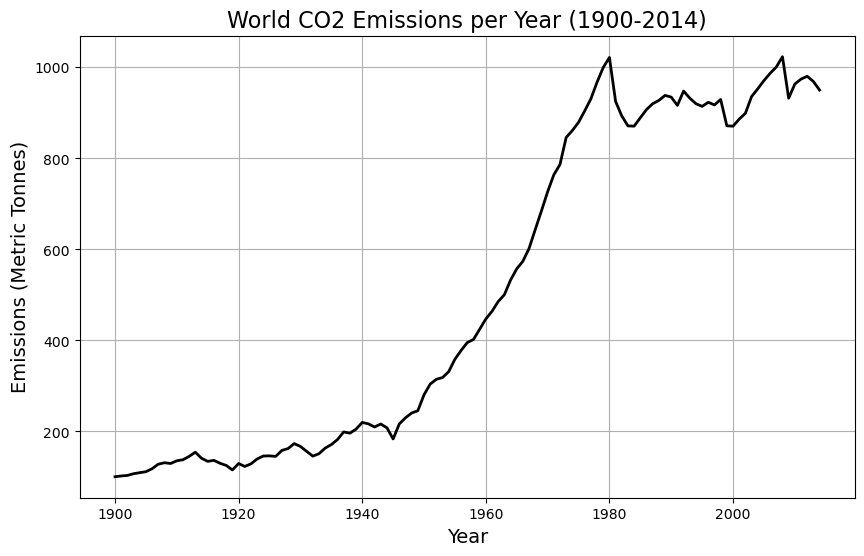

In [43]:
# Plotting CO2 emissions in the world over time
plt.figure(figsize=(10,6))
plt.plot(data_grouped['Year'], data_grouped['Value'], color='black', linewidth=2)
plt.title("World CO2 Emissions per Year (1900-2014)", fontsize=16, loc='center')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Emissions (Metric Tonnes)", fontsize=14)
plt.grid(True)
plt.show()

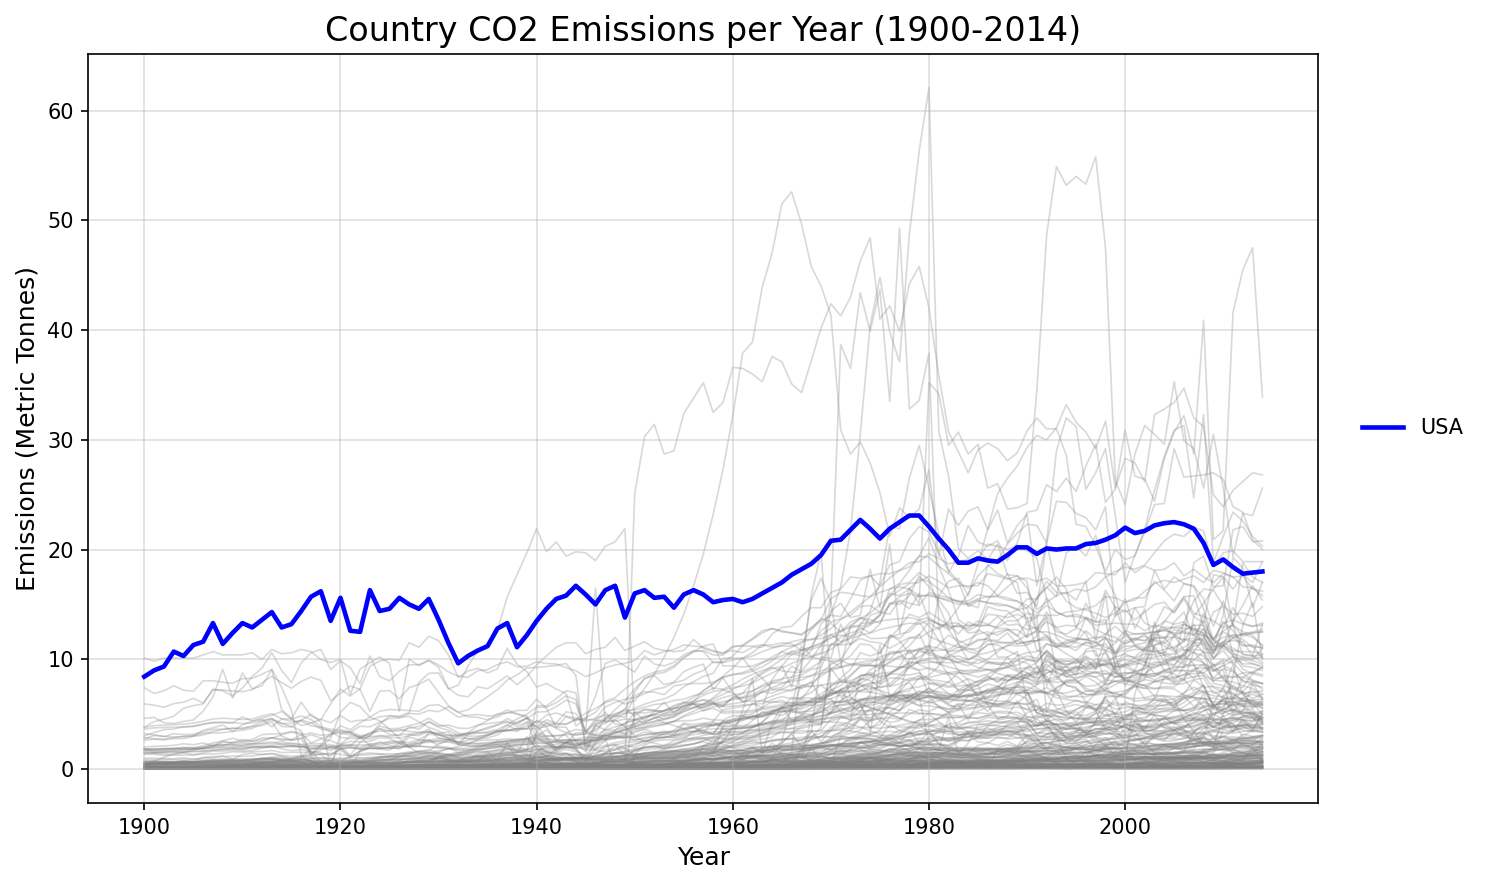

In [44]:
# Split the dataset to U.S. and other countries
non_us = data_filtered[data_filtered['Country'] != 'USA']
us_df = data_filtered[data_filtered['Country'] == 'USA']
plt.figure(figsize=(10, 6), dpi=150)

# Plot for all countries with transparency
sns.lineplot(
    data=non_us, x='Year', y='Value',
    units='Country', estimator=None,
    color='0.5', alpha=0.3, linewidth=0.8, zorder=1)
# Highlighting the US data in blue
sns.lineplot(
    data=us_df, x='Year', y='Value',
    color='blue', linewidth=2.2, label='USA', zorder=3)

plt.title('Country CO2 Emissions per Year (1900-2014)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Emissions (Metric Tonnes)', fontsize=12)
plt.grid(True, alpha=0.4)
plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.tight_layout()
plt.show()

Looking at the graph above, we can see that U.S. CO2 emissions remain high compared to most other countries. Highlighting the U.S. separately helps us see this long-term pattern clearly without it being lost in the global lines.

But the U.S. is only part of the story. To understand the bigger picture, it’s important to see how other major emitters compare—especially in recent years. That’s why next, we’ll look at the top 10 CO2 emitting countries in 2014 and explore how their trends stack up against each other.

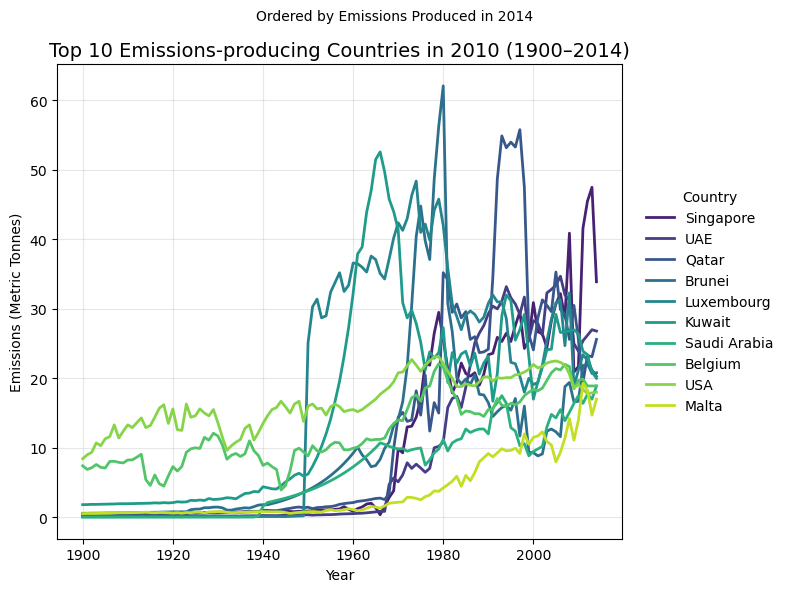

In [45]:
# Rank CO2 Emissions data, find the top 10 countries in 2014
em14 = (data_filtered
        .query("Indicator == 'Emissions' and Year == 2014")
        .loc[:, ['Country', 'Value']])

top10 = (em14.sort_values('Value', ascending=False)
               .head(10)
               .Country.tolist())

# Organize the top 10 countries in descening order
top10_ts = (data_filtered
            .query("Indicator == 'Emissions' and Year >= 1900")
            .loc[lambda d: d['Country'].isin(top10)]
            .copy())
cat_type = pd.api.types.CategoricalDtype(categories=top10, ordered=True)
top10_ts['Country'] = top10_ts['Country'].astype(cat_type)

# Plot the top 10 CO2 emissions countries
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=top10_ts, x='Year', y='Value',
    hue='Country',
    hue_order=top10,             
    palette=sns.color_palette('viridis', n_colors=len(top10)),
    linewidth=2)

plt.title('Top 10 Emissions-producing Countries in 2010 (1900–2014)', fontsize=14)
plt.suptitle('Ordered by Emissions Produced in 2014', y=0.98, fontsize=10)
plt.ylabel('Emissions (Metric Tonnes)')
plt.xlabel('Year')
plt.grid(True, alpha=0.3)
leg = plt.legend(title='Country', frameon=False, loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.tight_layout()
plt.show()

#### Tile Plots

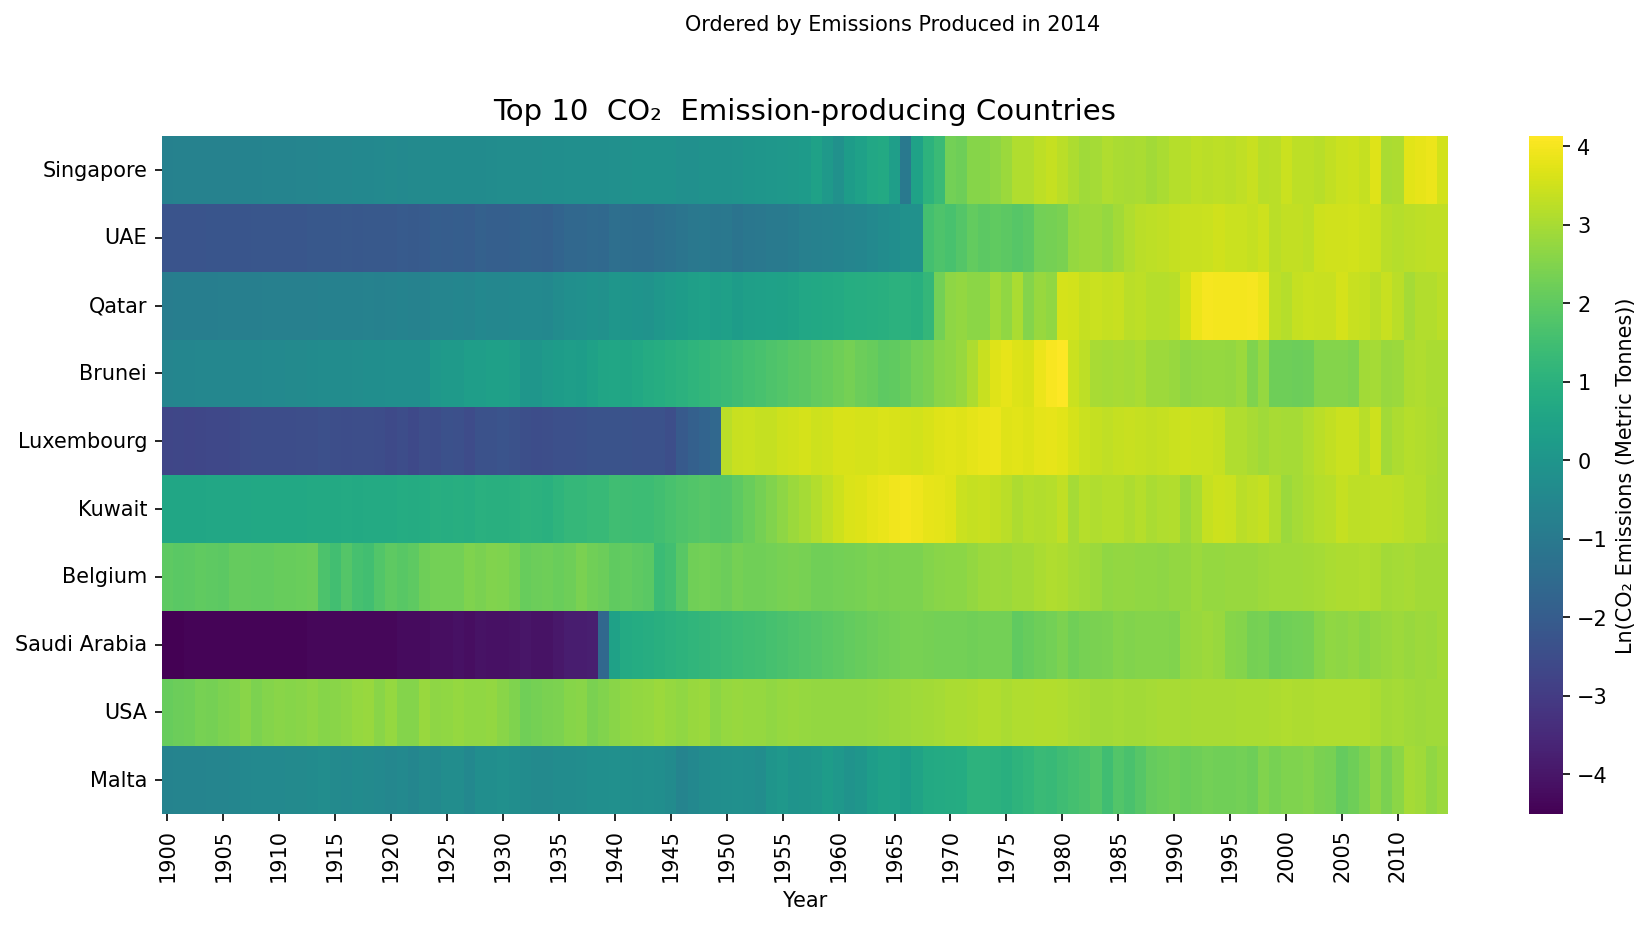

In [51]:
# Only save the data for top 10 countries in 1900-2014
year_min, year_max = 1900, 2014
em_top_range = (
    top10_ts
    .loc[(top10_ts["Year"] >= year_min) & (top10_ts["Year"] <= year_max)]
    .copy())

em_top_range["log_val"] = np.log(em_top_range["Value"])
year_for_order = year_max
order_year = (data_filtered
              .query("Indicator == 'Emissions' and Year == @year_for_order and Country in @top10")
              .sort_values('Value', ascending=False)['Country']
              .tolist())

# Tile plotting
tile = (
    em_top_range
    .pivot(index="Country", columns="Year", values="log_val")
    .reindex(index=order_year) 
    .reindex(columns=range(year_min, year_max+1)))

plt.figure(figsize=(12, 6), dpi=150)
ax = sns.heatmap(
    tile, cmap="viridis", linewidths=0,
    cbar_kws={"label": "Ln(CO₂ Emissions (Metric Tonnes))"},)

ax.set_xlabel("Year")
ax.set_ylabel("")
ax.set_title("Top 10  CO₂  Emission-producing Countries", fontsize=14, pad=8)
ax.figure.suptitle("Ordered by Emissions Produced in " + str(year_max), y=1.02, fontsize=10)

years = np.arange(year_min, year_max+1, 5)
ax.set_xticks(years - year_min + 0.5)
ax.set_xticklabels(years, rotation=90)

plt.tight_layout()
plt.show()

### Multiple Variable (Comparing Global Trends with the U.S.)

In this step, I will create separate plots to compare the United States with the rest of the world for multiple indicators over time. Each indicator will have its own subplot, with one line representing the United States and another representing the combined data for all other countries. This approach makes it easier to see how the U.S. trends differ from global patterns within each indicator.

#### Faceted Plots

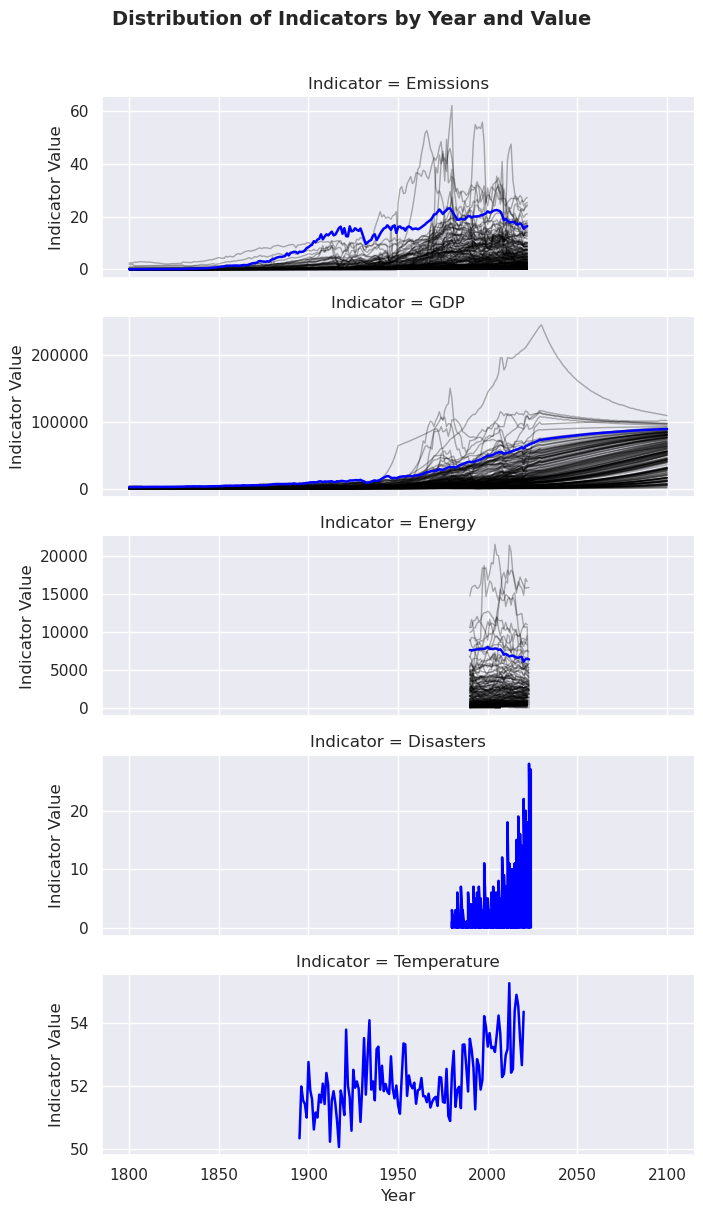

In [52]:
sns.set_theme()
df = data_long.copy()
df["is_us"] = df["Country"].isin(['USA', 'United States'])

order = list(df["Indicator"].dropna().unique())
g = sns.FacetGrid(df, row="Indicator", sharey=False, height=2.4, aspect=3, row_order=order)

for i, ind in enumerate(order):
    ax = g.axes[i, 0]
    sub = df[df["Indicator"] == ind]
    # Mark other countries in black
    for _, subc in sub[~sub["is_us"]].groupby("Country"):
        ax.plot(subc["Year"], subc["Value"], color="black", alpha=0.3, linewidth=1)
    # Highlight the U.S. in blue
    us = sub[sub["is_us"]]
    if not us.empty:
        ax.plot(us["Year"], us["Value"], color="blue", linewidth=1.8)
    ax.set_xlabel("Year")
    ax.set_ylabel("Indicator Value")
    
g.fig.suptitle("Distribution of Indicators by Year and Value", y=1.01, fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

In the previous step, I used facet_wrap to create separate subplots for each indicator, highlighting the comparison between the United States and all other countries.

In this step, I will switch to facet_grid with Indicator (rows) × Region (columns), placing the United States and the "Rest of the World" side by side.
Each country's line is shown individually, allowing for a clearer comparison of trends within the same indicator across different regions.

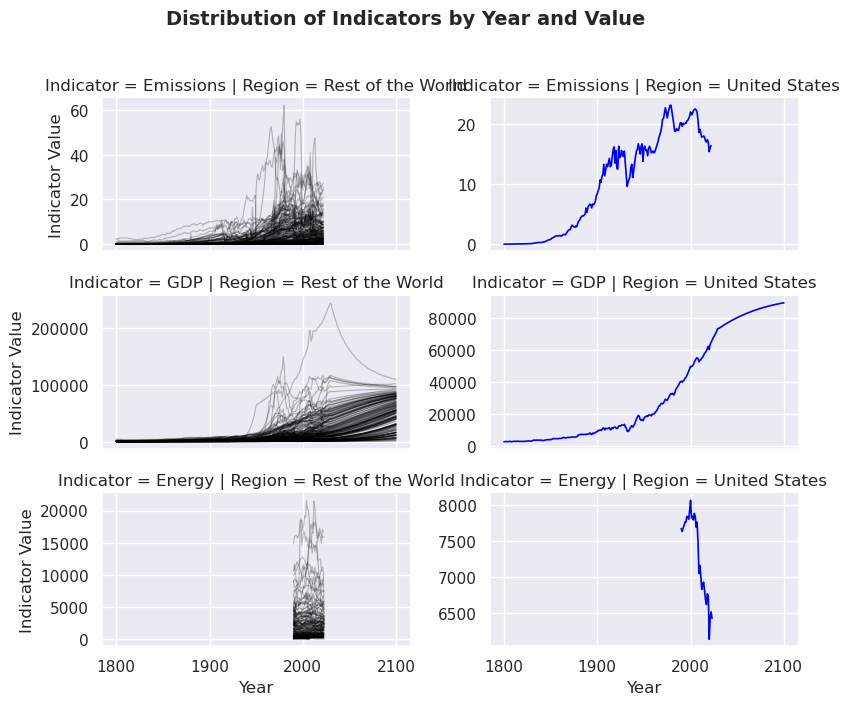

In [53]:
# Organize the dataset first
df = data_long.copy()
df["Region"] = np.where(df["Country"].isin(["USA","United States"]),
                        "United States", "Rest of the World")
df = df[~df["Indicator"].isin(["Disasters","Temperature"])]

row_order = list(df["Indicator"].unique())
col_order = ["Rest of the World", "United States"]

g = sns.FacetGrid(df, row="Indicator", col="Region",
                  sharey=False, height=2.3, aspect=1.8,
                  row_order=row_order, col_order=col_order)

# Plotting the dataset, make the U.S. data blue, and other countries black
for (ind, reg), sub in df.groupby(["Indicator", "Region"]):
    ax = g.axes[row_order.index(ind), col_order.index(reg)]
    for country, subc in sub.groupby("Country"):
        if country in ["USA", "United States"]:
            ax.plot(subc["Year"], subc["Value"], color="blue", alpha=1, lw=1.2)
        else:
            ax.plot(subc["Year"], subc["Value"], color="black", alpha=0.25, lw=0.8)

g.set_axis_labels("Year", "Indicator Value")
g.fig.suptitle("Distribution of Indicators by Year and Value",
               y=1.02, fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

#### Line Segment Plots

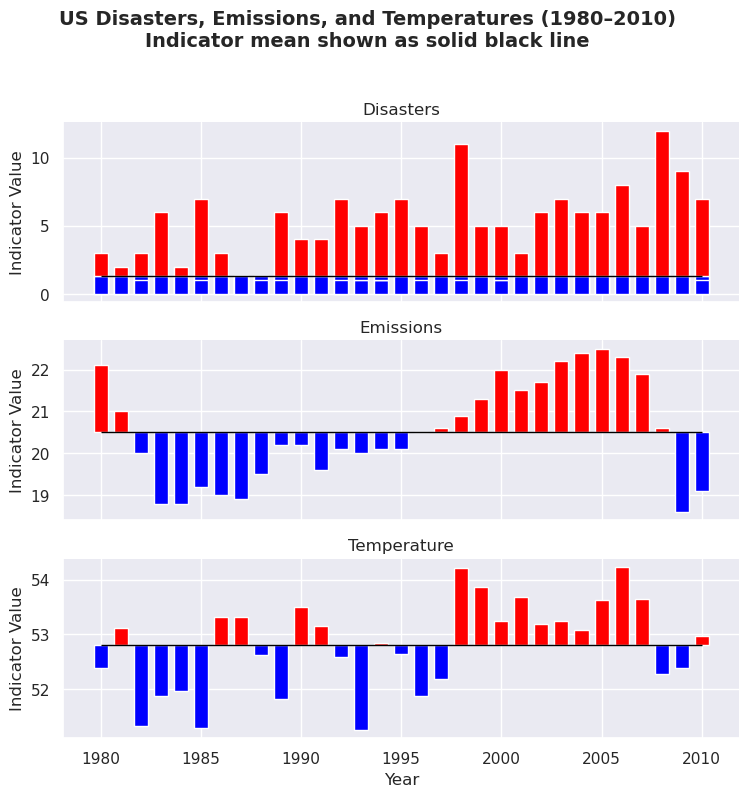

In [54]:
# Filter the dataset with only 1980-2010 USA data
df = data_long.copy()
df = df[df["Country"].isin(["USA","United States"])]
df = df[(df["Year"]>=1980) & (df["Year"]<=2010)]
df = df[df["Indicator"].isin(["Emissions","Temperature","Disasters"])]

# Calculate the statistics, and set color by + or -
df["Mean"] = df.groupby("Indicator")["Value"].transform("mean")
df["Diff_from_mean"] = df["Value"] - df["Mean"]
df["Diff_color"] = np.where(df["Diff_from_mean"]>=0, "red", "blue")

row_order = ["Disasters","Emissions","Temperature"]
row_order = [x for x in row_order if x in df["Indicator"].unique()]

g = sns.FacetGrid(df, row="Indicator", sharey=False, height=2.6, aspect=3, row_order=row_order)

# Plotting, where the black horizontal line represents the mean
# And the bars represents the different from mean, where red is positive and blue is negative
for i, ind in enumerate(row_order):
    ax = g.axes[i,0]
    sub = df[df["Indicator"]==ind].sort_values("Year")
    ax.hlines(y=sub["Mean"].iloc[0], xmin=sub["Year"].min(), xmax=sub["Year"].max(), color="black", linewidth=1)
    ax.bar(sub["Year"],
       sub["Diff_from_mean"],
       bottom=sub["Mean"],
       color=sub["Diff_color"],
       width=0.7)
    ax.set_xlabel("Year")
    ax.set_ylabel("Indicator Value")
    ax.set_title(ind)
    
g.fig.suptitle("US Disasters, Emissions, and Temperatures (1980–2010)\nIndicator mean shown as solid black line", y=1.02, fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

From the 3 plots above, we can see that:

**1. Disasters**
- Mostly below the long-term mean before the mid-1990s.
- Significant positive deviations after 2000, indicating more frequent or intense disasters.

**2. Emissions**
- Below the mean in the 1980s and early 1990s.
- Consistently above the mean from the late 1990s to around 2008, followed by a slight decline.

**3. Temperature**
- Mostly below the mean in the 1980s and early 1990s.
- More years above the mean after the mid-1990s, with frequent positive deviations in the 2000s.

#### Scatter Plots

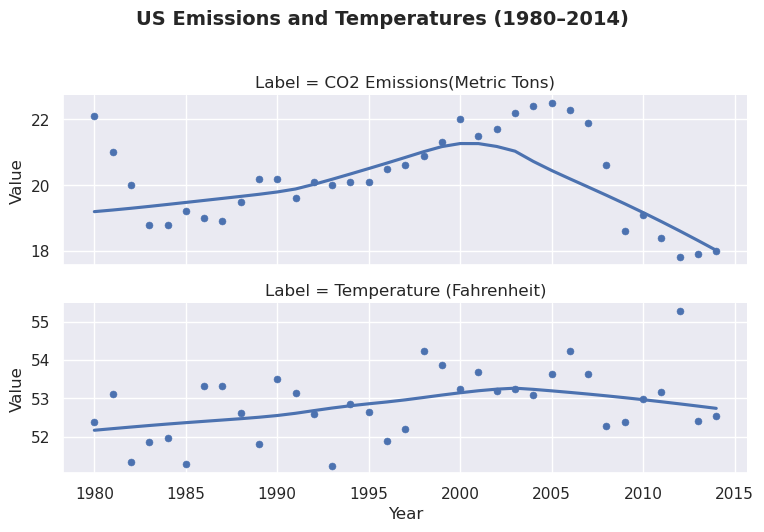

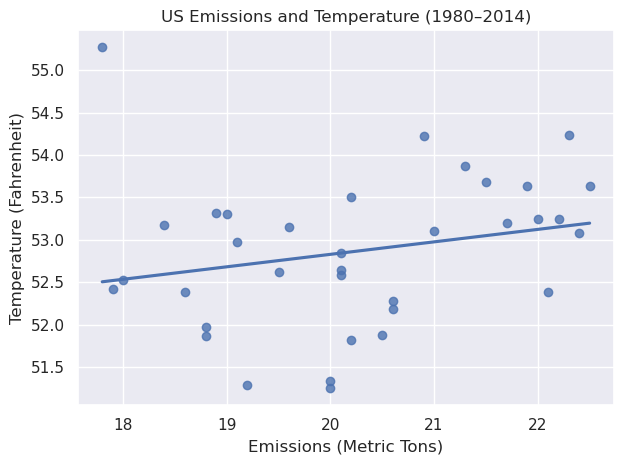

In [55]:
# Faceted scatter over time with LOESS (U.S. only)
df = data_long.copy()
df = df[df["Country"].isin(["USA","United States"])]
df = df[(df["Year"]>=1980) & (df["Year"]<=2014)]
df = df[df["Indicator"].isin(["Emissions","Temperature"])]

if "Label" not in df.columns:
    df["Label"] = df["Indicator"]

g = sns.FacetGrid(df, row="Label", sharey=False, height=2.6, aspect=3)

def _scatter_loess(data, color=None, **k):
    sns.scatterplot(data=data, x="Year", y="Value", s=25, edgecolor=None)
    sns.regplot(data=data, x="Year", y="Value", lowess=True, scatter=False, ci=None)

g.map_dataframe(_scatter_loess)
g.set_axis_labels("Year","Value")
g.fig.suptitle("US Emissions and Temperatures (1980–2014)", y=1.02, fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

# Emissions vs Temperature scatter with linear fit (U.S. only) 
wide = (df.pivot_table(index="Year", columns="Indicator", values="Value")
          .dropna(subset=["Emissions","Temperature"])
          .reset_index())

ax = sns.regplot(data=wide, x="Emissions", y="Temperature", ci=None)
ax.set_title("US Emissions and Temperature (1980–2014)")
ax.set_xlabel("Emissions (Metric Tons)")
ax.set_ylabel("Temperature (Fahrenheit)")
plt.tight_layout()
plt.show()

The first plot shows trends in U.S. CO₂ emissions and average temperature from 1980 to 2014. Both emissions and temperatures generally rose until the early 2000s, after which emissions declined while temperatures stayed relatively stable with slight fluctuations.

The second plot is a scatter plot of annual CO₂ emissions against average temperature. The slight upward slope of the regression line suggests a weak positive relationship: higher emissions are generally associated with higher average temperatures.

## 6. Data Analysis

This section builds on the previous data visualization by conducting statistical analyses to further explore the relationship between CO₂ emissions and temperature in the United States from 1980 to 2014.

### Calculate the Mean and SD for CO2 Emissions and Temperature

In [56]:
# Build the US wide table: 1980–2014 & overlapping years only
wide_us = (
    data_long
      .loc[
          data_long["Country"].isin(["USA", "United States"]) &
          data_long["Year"].between(1980, 2014) &
          data_long["Indicator"].isin(["Emissions", "Temperature"])
      ]
      .pivot_table(index="Year", columns="Indicator", values="Value", aggfunc="first")
      .dropna(subset=["Emissions", "Temperature"])  # keep only years with both
      .reset_index())

In [57]:
# Calculating the Mean and SD
mean_em = wide_us["Emissions"].mean()
sd_em = wide_us["Emissions"].std(ddof=1)
mean_temp = wide_us["Temperature"].mean()
sd_temp = wide_us["Temperature"].std(ddof=1)

summary = pd.DataFrame(
    {"mean": [mean_em, mean_temp], "sd": [sd_em, sd_temp]},
    index=["Emissions", "Temperature"])
print(summary.round(3))

               mean     sd
Emissions    20.223  1.402
Temperature  52.862  0.890


### Calculate the COrrelation Coefficient for Emissions and Temperature

In [58]:
from scipy import stats

# Pearson correlation
r, p_value = stats.pearsonr(wide_us["Emissions"], wide_us["Temperature"])

# Calculating the 95% CI for r using Fisher transformation
z = np.arctanh(r)
se = 1 / np.sqrt(len(wide_us) - 3)
z_ci = [z - 1.96 * se, z + 1.96 * se]
r_ci = np.tanh(z_ci)  # inverse transform

print(f"Pearson r: {r:.3f}")
print(f"p-value: {p_value:.4f}")
print(f"95% CI: [{r_ci[0]:.3f}, {r_ci[1]:.3f}]")

Pearson r: 0.232
p-value: 0.1801
95% CI: [-0.110, 0.525]


### Recreate the Scaled SCatter Plot

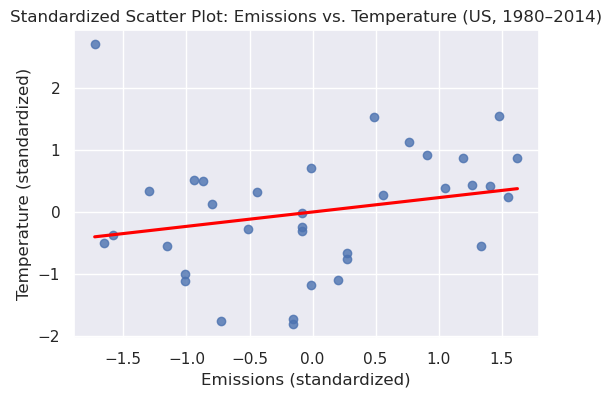

In [59]:
# Plotting the Standardized Scatter Plot
wide_us_std = (wide_us - wide_us.mean()) / wide_us.std()

plt.figure(figsize=(6,4))
sns.regplot(x="Emissions", y="Temperature", data=wide_us_std, ci=None, line_kws={"color":"red"})
plt.xlabel("Emissions (standardized)")
plt.ylabel("Temperature (standardized)")
plt.title("Standardized Scatter Plot: Emissions vs. Temperature (US, 1980–2014)")
plt.show()

In this analysis, we examined the relationship between CO₂ emissions and temperature in the United States from 1980 to 2014. First, we calculated the mean and standard deviation for both variables, finding that average emissions were approximately 20.223 (SD = 1.402) and average temperature was approximately 52.862°F (SD = 2.090).

Next, we computed the Pearson correlation coefficient to quantify the strength of association between emissions and temperature. The results (r = 0.232, p = 0.180, 95% CI = [-0.110, 0.525]) indicate a weak and statistically non-significant relationship, as the confidence interval includes zero.

Finally, a standardized scatter plot with a fitted regression line visually confirmed this finding. The points were widely dispersed, and the regression slope was relatively flat, reinforcing that CO₂ emissions and temperature changes in the US during this period did not exhibit a strong linear correlation.

## 7. Summary(Including the Summary Plot)

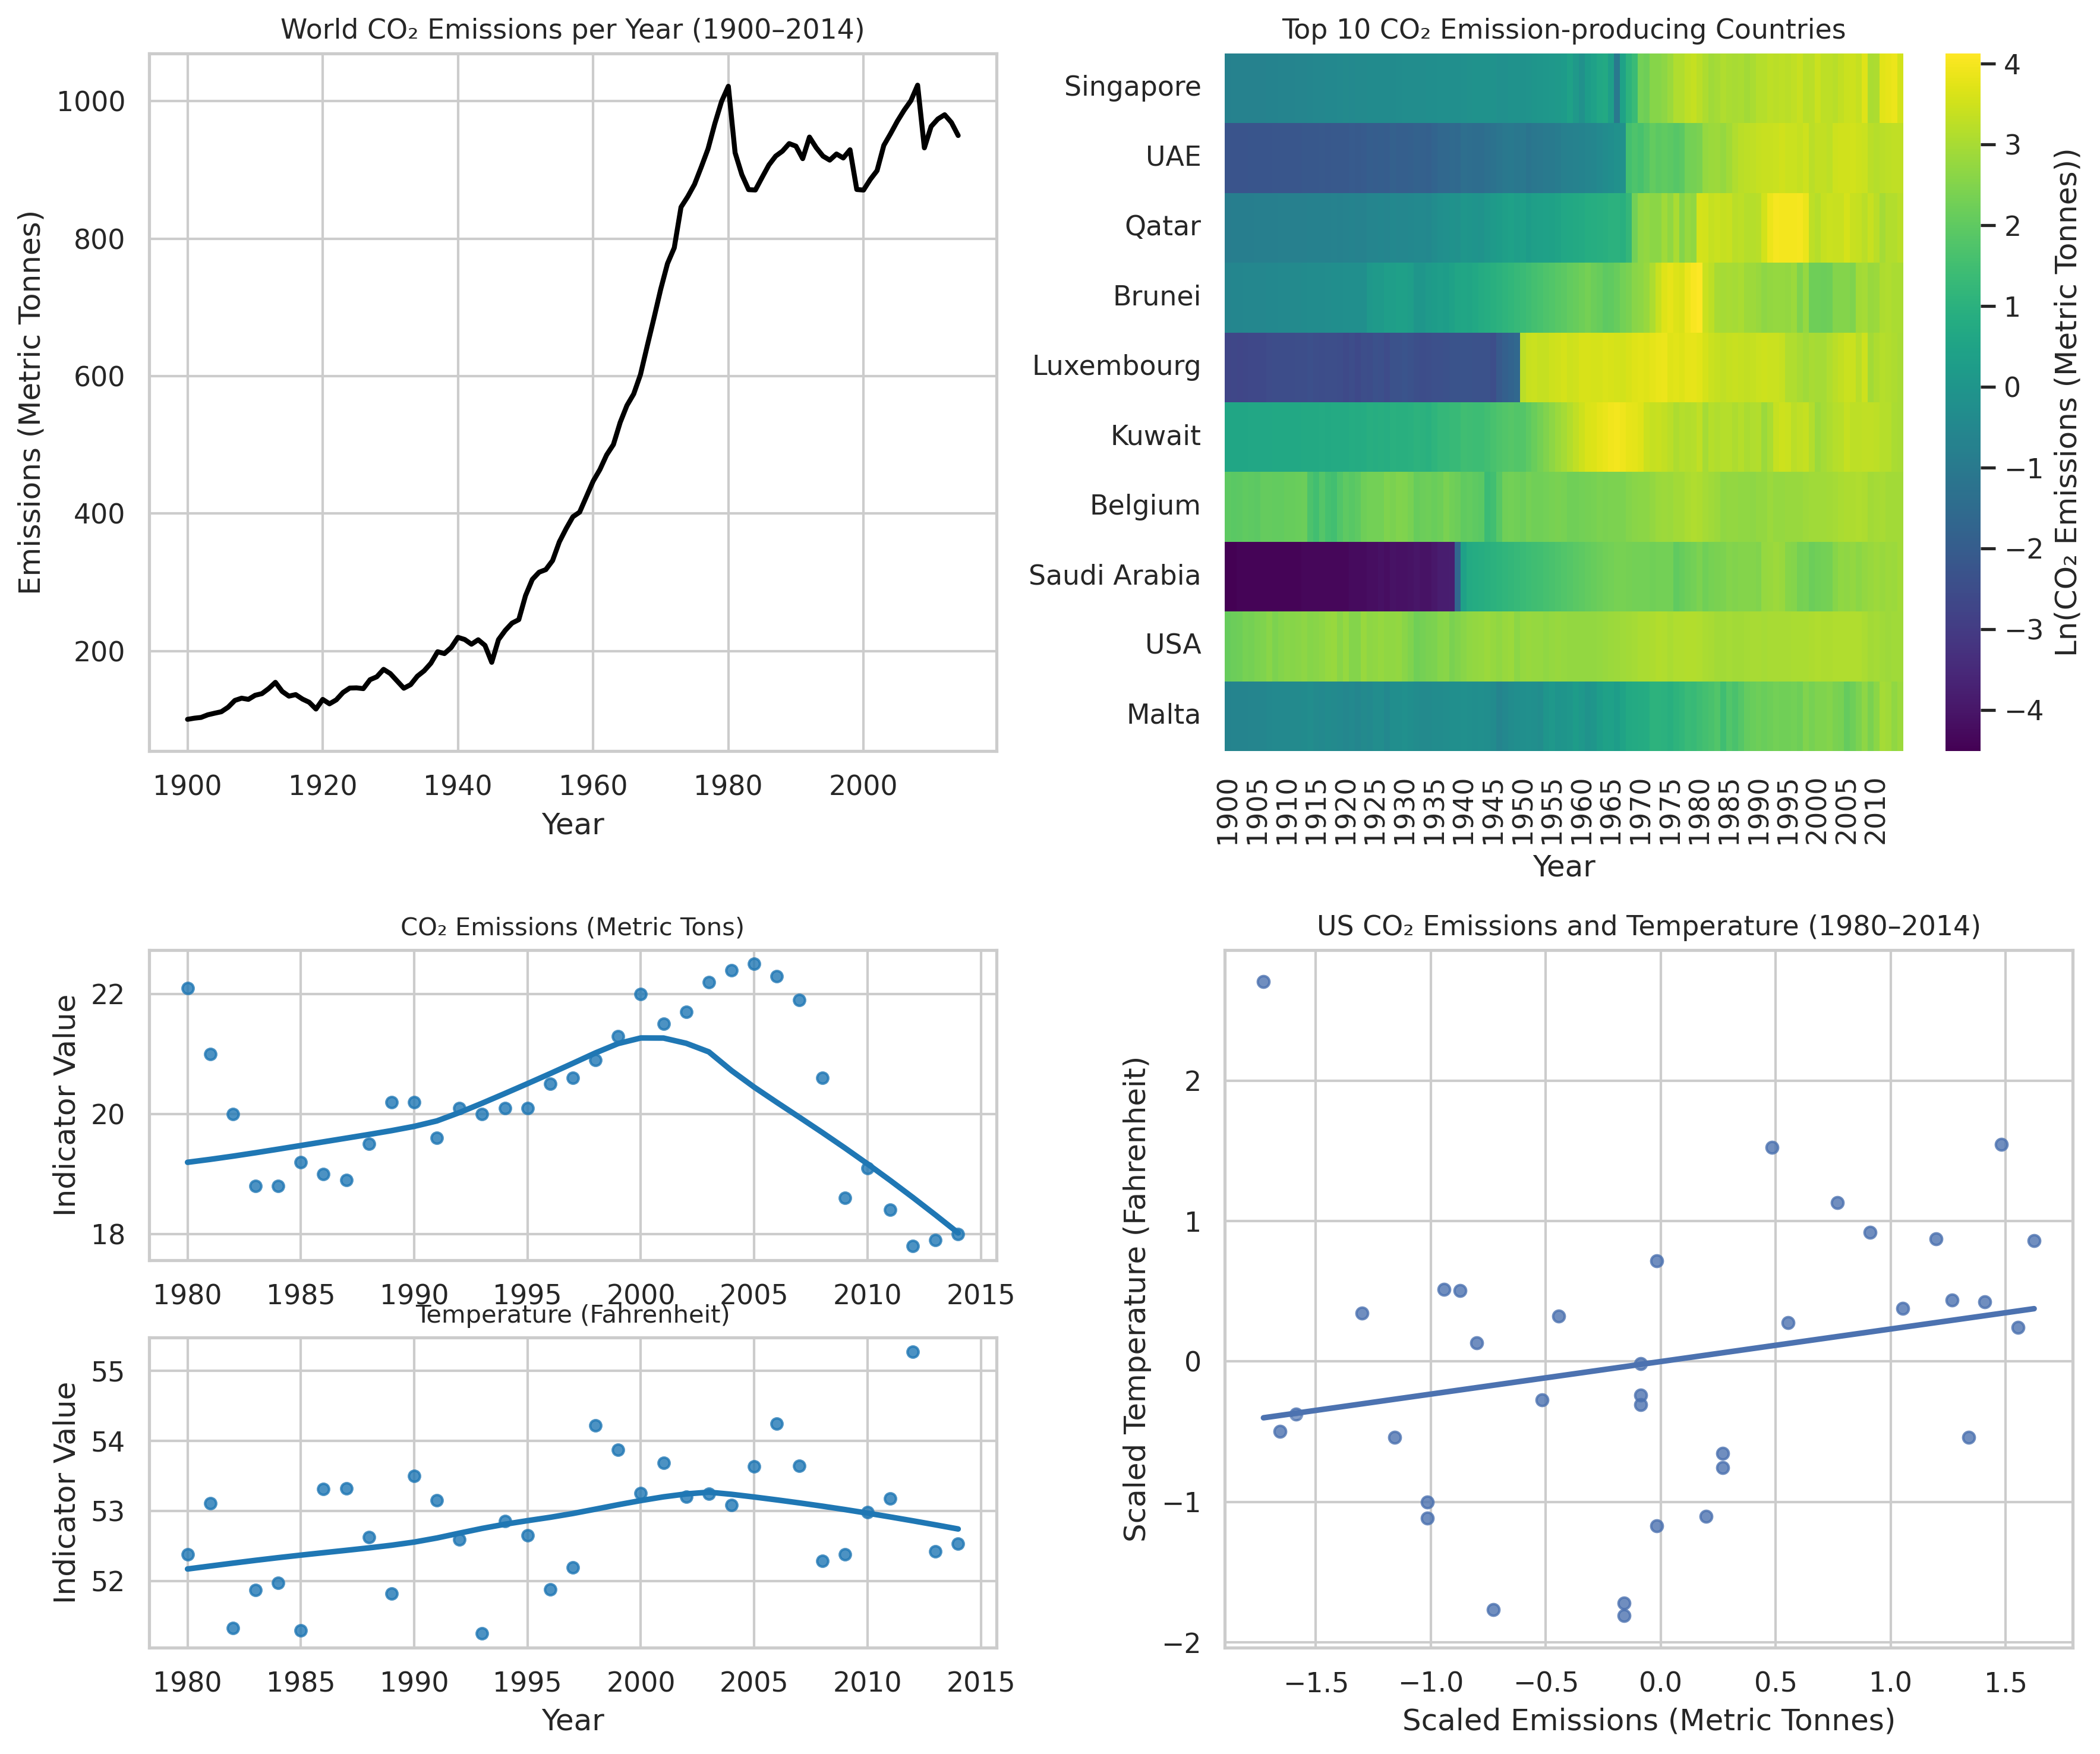

In [62]:
sns.set_theme(context="notebook", style="whitegrid")
world_year_min, world_year_max = 1900, 2014
tile_year_min,  tile_year_max  = 1900, 2014
rank_year = 2014 

top10 = (data_filtered.query("Indicator == 'Emissions' and Year == @rank_year")
                     .nlargest(10, "Value")["Country"].tolist())

top10_ts = (data_filtered
            .query("Indicator == 'Emissions' and Country in @top10 and @tile_year_min <= Year <= @tile_year_max")
            .copy())

# Plotting the World CO2 Emissions per Year 
world = (
    data_filtered.groupby("Year", as_index=False)["Value"].sum()
       .query("@world_year_min <= Year <= @world_year_max"))

# Plotting the Top 10 CO2 Emission-producing Countries
order_rows = (top10_ts.query("Year == @rank_year")
                        .sort_values("Value", ascending=False)["Country"].tolist())
tile_df = (top10_ts.pivot_table(index="Country", columns="Year", values="Value", aggfunc="first", observed=False)
                    .reindex(index=order_rows)
                    .reindex(columns=range(tile_year_min, tile_year_max+1)))
tile_log = np.log(tile_df)

# Plotting the U.S. CO2 Emissions/Temperature
if "wide_us" not in globals():
    us_long = data_long.query("Country == 'United States' and Indicator in ['Emissions','Temperature']")
    overlap = (
        us_long.pivot_table(index="Year", columns="Indicator", values="Value", aggfunc="first")
               .dropna(subset=["Emissions", "Temperature"])
               .loc[1980:2014]
    ).reset_index()
    wide_us = overlap.copy()
else:
    wide_us = wide_us.dropna(subset=["Emissions", "Temperature"]).copy()

# Plotting the U.S. CO2 Emissions and Temperature
emu = wide_us.copy()
emu["Emissions_z"]    = (emu["Emissions"]    - emu["Emissions"].mean())    / emu["Emissions"].std(ddof=1)
emu["Temperature_z"]  = (emu["Temperature"]  - emu["Temperature"].mean())  / emu["Temperature"].std(ddof=1)

# Joining together
fig = plt.figure(figsize=(12, 10), dpi=300)
gs  = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])

# Top left
ax_world = fig.add_subplot(gs[0, 0])
ax_world.plot(world["Year"], world["Value"], color="black", linewidth=2)
ax_world.set_title(f"World CO₂ Emissions per Year ({world_year_min}–{world_year_max})", fontsize=11)
ax_world.set_xlabel("Year"); ax_world.set_ylabel("Emissions (Metric Tonnes)")

# Top right
ax_tile = fig.add_subplot(gs[0, 1])
sns.heatmap(
    tile_log, ax=ax_tile, cmap="viridis", cbar_kws={"label": "Ln(CO₂ Emissions (Metric Tonnes))"},
    linewidths=0
)
ax_tile.set_title("Top 10 CO₂ Emission-producing Countries", fontsize=11)
ax_tile.set_xlabel("Year"); ax_tile.set_ylabel("")

years = np.arange(tile_year_min, tile_year_max + 1, 5)
ax_tile.set_xticks(years - tile_year_min + 0.5)
ax_tile.set_xticklabels(years, rotation=90)

# Bottom Left
sub = gs[1, 0].subgridspec(2, 1, hspace=0.25)
ax_em   = fig.add_subplot(sub[0, 0])
ax_temp = fig.add_subplot(sub[1, 0], sharex=ax_em)

sns.regplot(data=wide_us, x="Year", y="Emissions",    ax=ax_em,   lowess=True, scatter_kws={"s":20}, ci=None, color="tab:blue")
sns.regplot(data=wide_us, x="Year", y="Temperature",  ax=ax_temp, lowess=True, scatter_kws={"s":20}, ci=None, color="tab:blue")

ax_em.set_title("CO₂ Emissions (Metric Tons)", fontsize=10)
ax_temp.set_title("Temperature (Fahrenheit)", fontsize=10)
ax_em.set_xlabel(""); ax_em.set_ylabel("Indicator Value")
ax_temp.set_xlabel("Year"); ax_temp.set_ylabel("Indicator Value")

# Bottom right
ax_sc = fig.add_subplot(gs[1, 1])
sns.regplot(data=emu, x="Emissions_z", y="Temperature_z", ax=ax_sc, ci=False, scatter_kws={"s":22})
ax_sc.set_title("US CO₂ Emissions and Temperature (1980–2014)", fontsize=11)
ax_sc.set_xlabel("Scaled Emissions (Metric Tonnes)")
ax_sc.set_ylabel("Scaled Temperature (Fahrenheit)")

plt.tight_layout()
plt.show()
fig.savefig("summary_mainplot.png", dpi=300, bbox_inches="tight")

### Synopsis
#### Global trend (Top Left) 
The World CO2 Emissions climb gradually to ~1950, then accelerate steeply, reaching a high in the late 2000s before edging down slightly by 2014.
    
#### U.S. v.s. Other Countries (Top Right)
Countries are ordered by their 2014 emission level (log scale). Most rows darken over time (growth), some have gaps (missing years), and a few—including the U.S. row—show less darkening toward the 2010s than in the early-/mid-2000s (relative easing). This view is descriptive; it highlights that increases concentrate in specific countries, while others level off.

#### U.S. Time Series (Bottom Left)
From 1980–2014, U.S. emissions rise into the early/mid-2000s and then decline; U.S. annual temperature shows a gentle upward trend with inter-year variability. Summary stats (your code):
– Emissions: mean = 20.223, sd = 1.402
– Temperature: mean = 52.862 °F, sd = 0.890 °F

#### U.S. CO2 Emissions v.s. Temperature (Bottom Right)
The standardized scatter with a linear fit indicates a weak positive association: Pearson r = 0.232, 95% CI [−0.110, 0.525], p = 0.180. Within 1980–2014, higher-than-average U.S. emissions tend to coincide with warmer-than-average U.S. temperatures, but the linear association is not statistically significant.

Takeaway for the main questions: 
    
1. Globally, CO2 rises sharply post-1950 and peaks in the late 2000s; in the U.S., emissions grow through the early/mid-2000s and then decline, while temperatures trend upward over 1980–2014. The heatmap shows that growth is not uniform—some countries intensify, others flatten.

2. For 1980–2014, U.S. emissions and U.S. temperature show a small, positive but non-significant linear relationship (r = 0.232; 95% CI [−0.110, 0.525]). Our disaster counts show episodic spikes, but we did not compute a formal correlation here; that analysis should include r (and a regression), with time-series adjustments for autocorrelation.